In [1]:
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from HexDetector import hex_radius_inner_to_outer
from analysis_functions import *

set_matplotlib_style()

In [2]:
# run_path = '/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run243-Pool4_treeParam.root'
run_path = '/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run325-Pool2_treeParam.root'

In [3]:
with uproot.open(run_path) as file:
    tree = file['ParameterTree']
    SRSNo = tree.arrays(['SRSNo'])
    print(SRSNo)

[{SRSNo: 0}, {SRSNo: 1}, {...}, ..., {...}, {SRSNo: 458058}, {SRSNo: 458059}]


In [4]:
# Convert SRSNo to a numpy array and exlude nan values
SRSNo = np.array(SRSNo['SRSNo'])
SRSNo = SRSNo[~np.isnan(SRSNo)]

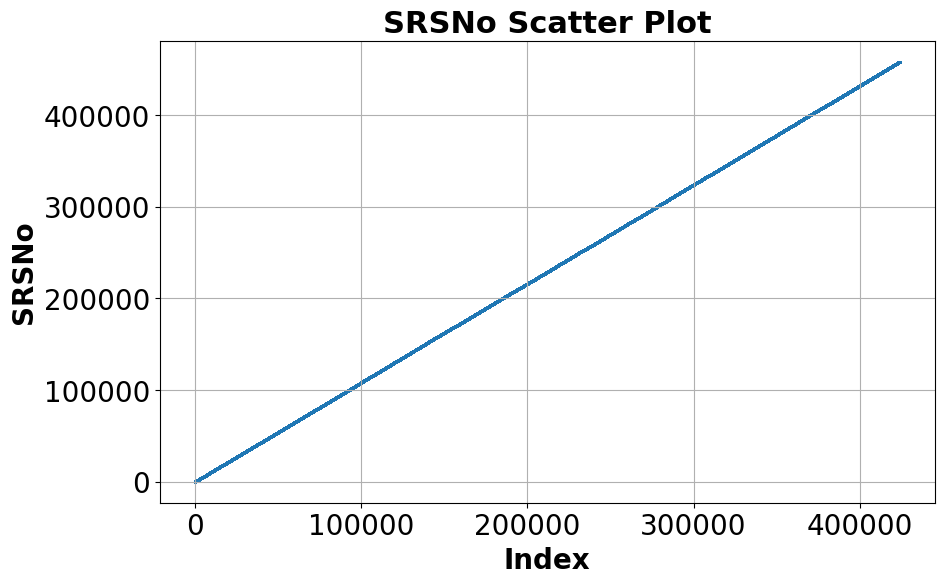

In [5]:
#plot the SRSNo exluding nan values in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(SRSNo)), SRSNo, s=1)
plt.xlabel('Index')
plt.ylabel('SRSNo')
plt.title('SRSNo Scatter Plot')
plt.grid()

[  5383   5384   5385 ... 458057 458058 458059]
[1 1 1 ... 1 1 1]
423999
424000


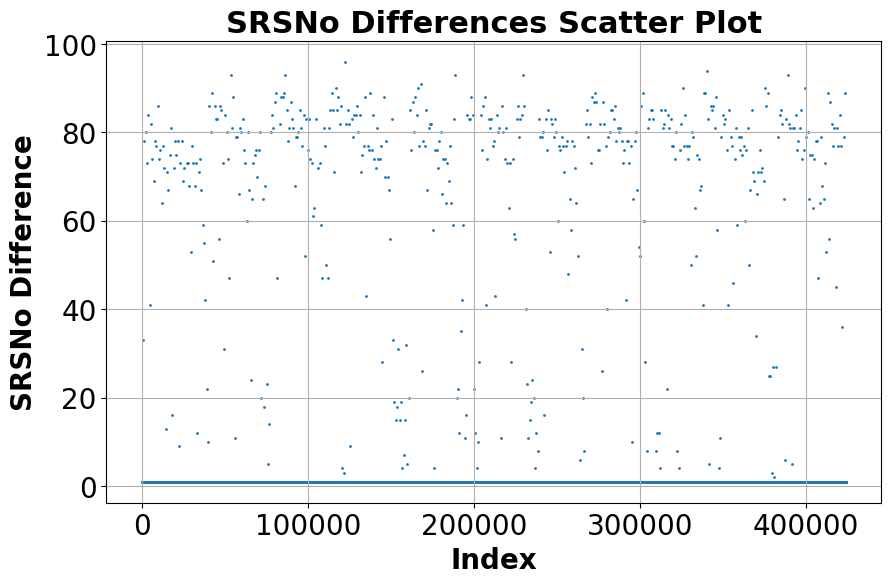

In [6]:
print(SRSNo[5000:])
print(np.diff(SRSNo[5000:]))
SRS_diff = np.diff(SRSNo)
print(len(SRS_diff))
print(len(SRSNo))

#ensure SRSNo and SRS_diff are the same length
if len(SRSNo) != len(SRS_diff) + 1:
    print("SRSNo and SRS_diff are not the same length")
#plot the diffences of SRSNo
plt.figure(figsize=(10, 6))
plt.scatter(range(len(SRS_diff)), SRS_diff, s=1)
plt.xlabel('Index')
plt.ylabel('SRSNo Difference')
plt.title('SRSNo Differences Scatter Plot')
plt.grid()

In [7]:
#print the SRS differences with values greater than 1
SRS_diff_greater_than_1 = SRS_diff[SRS_diff > 1]
print(len(SRS_diff_greater_than_1))

523


In [8]:
#get the inxes of the SRS differences with values greater than 1
SRS_diff_greater_than_1_indexes = np.where(SRS_diff > 1)[0]
print(SRS_diff_greater_than_1_indexes)

[   799   1599   2399   3199   3999   4799   5599   6399   7199   7999
   8799   9599  10399  11199  11999  12799  13599  14399  15199  15999
  16799  17599  18399  19199  19999  20799  21599  22399  23199  23999
  24799  25599  27199  27999  28799  29599  30399  31199  31999  32799
  33599  34399  35199  35999  36799  37599  38399  39199  39999  40799
  41599  42399  43199  43999  44799  45599  46399  47199  47999  48799
  49599  50399  51199  51999  52799  53599  54399  55199  55999  56799
  57599  58399  59199  59999  60799  61599  62399  63199  63999  64799
  65599  66399  67199  67999  68799  69599  70399  71199  71999  72799
  73599  74399  75199  75999  76799  77599  78399  79199  79999  80799
  81599  83199  83999  84799  85599  86399  87199  87999  88799  89599
  90399  91199  91999  92799  93599  94399  95199  95999  96799  97599
  98399  99199  99999 100799 101599 102399 103199 103999 104799 106399
 107199 107999 108799 109599 110399 111199 111999 112799 113599 114399
 11519

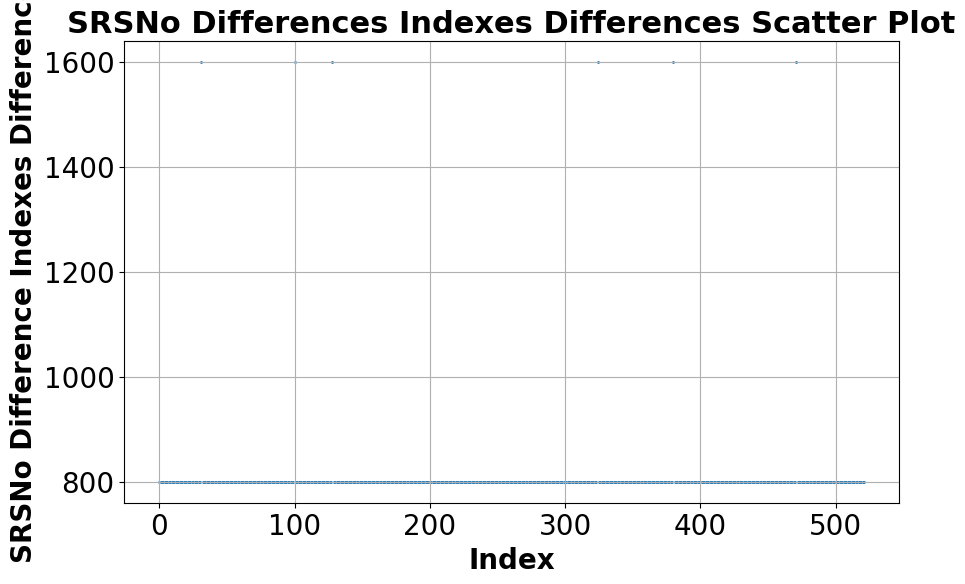

In [9]:
#get the differences of the SRS_diff_greater_than_1_indexes
SRS_diff_greater_than_1_indexes_diff = np.diff(SRS_diff_greater_than_1_indexes)
#plot the differences of the SRS_diff_greater_than_1_indexes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(SRS_diff_greater_than_1_indexes_diff)), SRS_diff_greater_than_1_indexes_diff, s=1)
plt.xlabel('Index')
plt.ylabel('SRSNo Difference Indexes Difference')
plt.title('SRSNo Differences Indexes Differences Scatter Plot')
plt.grid()